# Importing Libraries
Imageio is used for reading the images. The functions are implemented from scratch.

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import sys

# Reading Images
Reading the images present. It is assumed that the images are present in the same directory as the notebook.

In [2]:
cells = imageio.imread("cells_scale.png")
lena = imageio.imread("lena_translate.png")
pisa = imageio.imread("pisa_rotate.png")

# Floor
An implementation of the floor function from scratch

In [3]:
def floor(value):
    # example of how the int function works
    # int(1.3) = 1, int(3.8) = 3
    # int(-0.1) = 0, int(-4.8) = -4
    if value >= 0:
        return int(value)
    else:
        return int(value)-1

# Bilinear Interpolation
Here the Bilinear Interpolation function is defined. Notation is similar that as used in the class.

In [4]:
def bilinear_interpolate(zero_padded_source_image, x, y):
    # shape of the zero padded image
    dx, dy = np.shape(zero_padded_source_image)
    # get the shape of the original image
    dx, dy = dx-2, dy-2
    # +1 as we are taking coordinates with respect to a zero padded image
    x, y = x+1, y+1

    # x', y', a, b as defined in the lecture
    x_prime, y_prime = floor(x), floor(y)
    a = x-x_prime
    b = y-y_prime

    if x_prime >= 0 and x_prime <= dx and y_prime >= 0 and y_prime <= dy:
        # intensity value using bilinear interpolation
        intensity_val = (1-a)*(1-b)*zero_padded_source_image[x_prime, y_prime] \
            + (1-a)*b*zero_padded_source_image[x_prime, y_prime+1] \
            + a*(1-b)*zero_padded_source_image[x_prime+1, y_prime] \
            + a*b*zero_padded_source_image[x_prime+1, y_prime+1]
    else:
        # If the (xs, ys) does not exist in the source image, assign 0
        # for the corresponding (xt, yt) in the target image
        intensity_val = 0

    return intensity_val

# Transforms
A single function that takes in a keyword denoting the type of transform, the required parameters and performs the transform on the source image. Target to source mapping using Bilinear Interpolation is done.

In [5]:
def transform(source_image, transform_type, params):
    # zero padding the image for bilinear interpolation
    x, y = np.shape(source_image)
    image = np.zeros((x+2, y+2))
    image[1:-1, 1:-1] = source_image
    # center of the given image
    center_x, center_y = x/2, y/2

    target_image = np.zeros((x, y))

    if transform_type == "translate":
        tx, ty = params
        for xt in range(x):
            for yt in range(y):
                xs = xt-tx
                ys = yt-ty
                val = bilinear_interpolate(image, xs, ys)
                target_image[xt, yt] = val

    elif transform_type == "rotate":
        theta = params
        # convert to radians as NumPy uses radians
        theta *= np.pi/180
        for xt in range(x):
            for yt in range(y):
                # rotate about the center
                # To rotate around a point (x0, y0), we first translate to that point
                x_c, y_c = xt-center_x, yt - center_y
                # Then we apply rotation as we would apply rotation around the origin
                # And then translate back
                xs = np.cos(theta)*x_c - np.sin(theta)*y_c + center_x
                ys = np.cos(theta)*y_c + np.sin(theta)*x_c + center_y
                val = bilinear_interpolate(image, xs, ys)
                target_image[xt, yt] = val

    elif transform_type == "scale":
        scale = params
        # If scale factor is positive, then do the transform
        if scale > 0:
            for xt in range(x):
                for yt in range(y):
                    # scale about the center as it looks more aesthetically pleasing
                    # To scale around a point (x0, y0), we first translate to that point
                    # Then we apply rotation as we would apply rotation around the origin
                    # And then translate back
                    xs = (xt-center_x)/scale+center_x
                    ys = (yt-center_y)/scale+center_y
                    val = bilinear_interpolate(image, xs, ys)
                    target_image[xt, yt] = val

        # Else set the target image to zero (already initialized to zero)
        # This also prevents division by zero errors
    return target_image

# Plotting function
Defining a plotting function for easy plotting of all the cases.

In [6]:
def plotter(image, transformed_image, title_1, title_2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax1.imshow(image, 'gray')
    ax2.imshow(transformed_image, 'gray')
    ax1.title.set_text(title_1)
    ax2.title.set_text(title_2)
    plt.axis('off')
    plt.show()

# Results
The results shown are for the default parameters as mentioned in the assignment. The descriptions mentioned are also for the default parameters. To run the transforms with a different set of parameters, change the parameter in the following cell and re-run the cell for the corresponding transform cell.

# Parameters
Set the parameters here. The default values are mentioned below.
- Translation Parameters: $t_{x}$ = 3.75, $t_{x}$ = 4.3
- Rotation Parameter: $\theta$ = -4.5$^{\circ}$
- Scale Parameter: a = 0.8, 1.3 

In [7]:
tx = 3.75
ty = 4.3
theta = -4.5
a_vals = (0.8, 1.3)

## Translation of Lena's Image
The image of Lena is translated by $t_{x}$=3.75 and $t_{y}$=4.3.

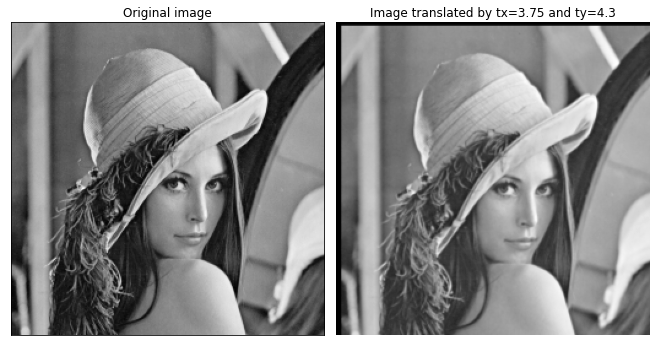

In [8]:
new_lena = transform(lena, transform_type="translate", params=(tx, ty))
plotter(lena, new_lena, "Original image",f"Image translated by tx={tx} and ty={ty}")

## Rotation of The Leaning Tower of Pisa Image
The image of The Leaning Tower of Pisa is rotated by $\theta$ = -4.5 degrees in the clockwise direction, or, 4.5 degrees in the anti-clockwise direction.

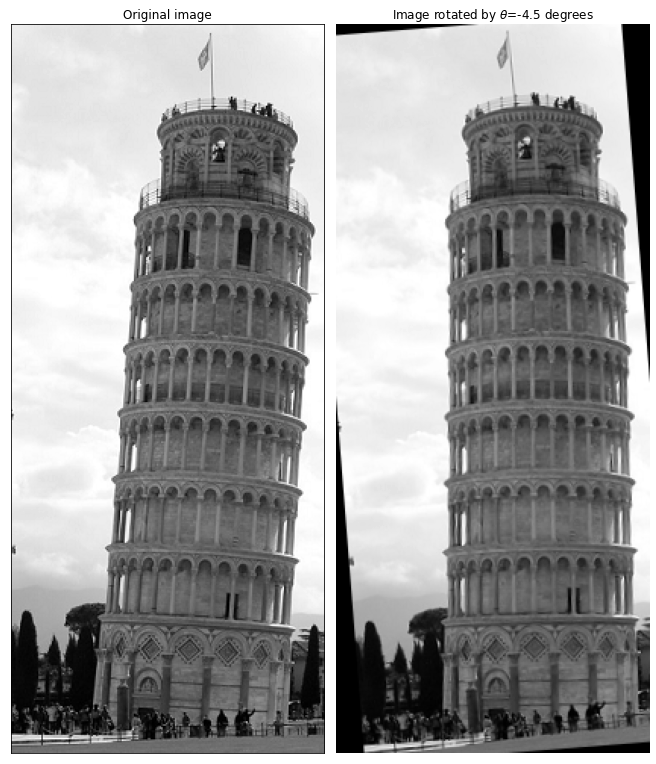

In [9]:
new_pisa = transform(pisa, transform_type="rotate", params=theta)
plotter(pisa, new_pisa, "Original image",fr"Image rotated by $\theta$={theta} degrees")

## Scaling of the Cells Image
In this section, we show the result of applying uniform scaling on the cells image. The scaling has been applied in a centralized manner so that the image zooms in and out about its center. This is done to give the final result a more aesthetically pleasing appearance.

### Zooming out
Applying uniform scaling of 0.8 on the cells image. 

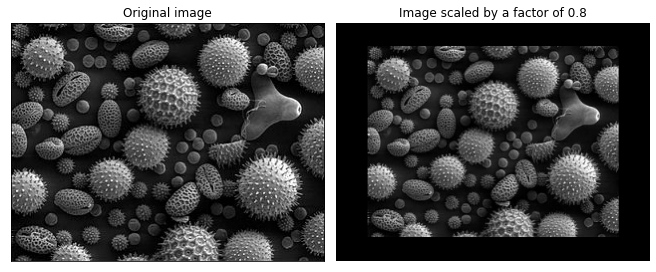

In [10]:
new_cells = transform(cells, transform_type="scale", params=a_vals[0])
plotter(cells, new_cells, "Original image", f"Image scaled by a factor of {a_vals[0]}")

### Zooming in
Applying uniform scaling of 1.3 on the cells image

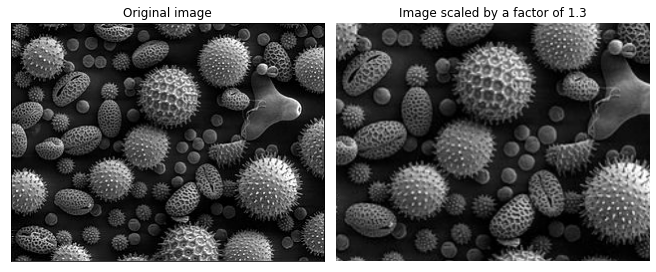

In [11]:
new_cells = transform(cells, transform_type="scale", params=a_vals[1])
plotter(cells, new_cells, "Original image", f"Image scaled by a factor of {a_vals[1]}")

# Observations
The following observations can be made.
- By doing target to source mapping, we escape the problem of holes or missing values in the target image.
- We do not see any noticeable checkerboard effects as we are using Bilinear Interpolation. Checkerboard effects would be much more prominent if we used nearest neighbor instead.  
- In all of the target images, the black pixels are due to lack of information about the corresponding source pixels for that target pixel. For implementation, zero padding of the target is done whenever we do not have enough information.
- The $\theta$, rotation by which appears to make The Leaning Tower of Pisa image straight, is approximately 4.5 degrees in the anti-clockwise direction. This is slightly off from the actual tilt of The Leaning Tower of Pisa, which is -3.97 degrees.
